In [1544]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error



In [1545]:
gas_df = pd.read_csv('Nat_Gas.csv')

gas_df.head()

gas_df.dropna()

,Dates,Prices
0,10/31/20,10.10
1,11/30/20,10.30
2,12/31/20,11.00
3,1/31/21,10.90
4,2/28/21,10.90
5,3/31/21,10.90
6,4/30/21,10.40
7,5/31/21,9.84
8,6/30/21,10.00
9,7/31/21,10.10


In [1546]:
gas_df.describe()

,Prices
count,48.000000
mean,11.207083
std,0.757897
min,9.840000
25%,10.650000
50%,11.300000
75%,11.625000
max,12.800000


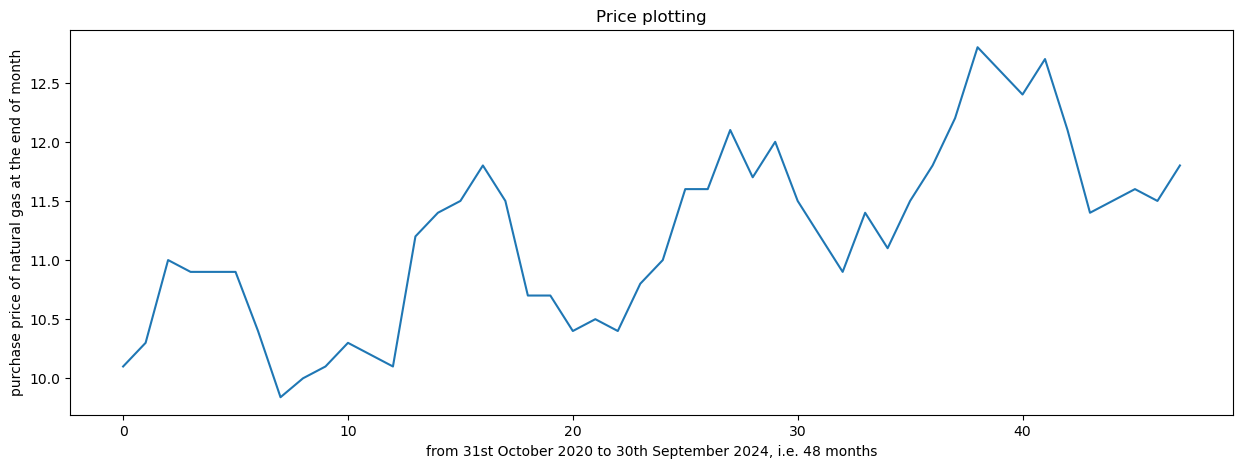

In [1547]:
plt.figure(figsize = (15,5))
plt.plot(gas_df["Prices"])
plt.title('Price plotting')
plt.xlabel('from 31st October 2020 to 30th September 2024, i.e. 48 months')
plt.ylabel('purchase price of natural gas at the end of month')
plt.show()

In [1548]:
#feature engineering

#Splitting the Date column into days, months and year


gas_df['Dates'] = pd.to_datetime(gas_df['Dates'])
gas_df['Year'] = gas_df['Dates'].dt.year
gas_df['Month'] = gas_df['Dates'].dt.month


gas_df.head()

C:\Users\ideod\AppData\Local\Temp\ipykernel_15028\3429212373.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  gas_df['Dates'] = pd.to_datetime(gas_df['Dates'])


,Dates,Prices,Year,Month
0,2020-10-31,10.1,2020,10
1,2020-11-30,10.3,2020,11
2,2020-12-31,11.0,2020,12
3,2021-01-31,10.9,2021,1
4,2021-02-28,10.9,2021,2


In [1549]:
#tracking July months only from 2020 to 2024
gas_July = gas_df[gas_df['Month'] == 7]
gas_July

,Dates,Prices,Year,Month
9,2021-07-31,10.1,2021,7
21,2022-07-31,10.5,2022,7
33,2023-07-31,11.4,2023,7
45,2024-07-31,11.6,2024,7


In [1550]:
#checking for null values 
gas_df.duplicated().sum().any()

False

In [1551]:
gas_df.isnull().values.any()

False

In [1552]:
#definition of the problem

print('The problem could be solved through regression analysis, as it can be used to determine relationship between actual and predicted price')

The problem could be solved through regression analysis, as it can be used to determine relationship between actual and predicted price


In [1553]:
#CREATING TRAINING AND TEST SETS
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle = True)

In [1554]:
#CREATING AND TRAINING LINEAR REGRESSION MODEL

from sklearn.metrics import confusion_matrix, accuracy_score
#creating a price list for next year price function

def next_year_price(next_year):
    prices_next_year = []
    for i in np.arange(12):
        X = np.array(gas_df[gas_df['Month'] == 1+i]['Year']).reshape(-1,1)
        y = np.array(gas_df[gas_df['Month'] == 1+ i]['Prices'])
        regress = LinearRegression().fit(X,y)
        predictions = regress.predict([[next_year]])
        prices_next_year.append(round(float(predictions), 2))

    return prices_next_year


In [1555]:
#to predict gas prices for the year 2025
gas_prices2025 = next_year_price(2025)
np.array(gas_prices2025)

C:\Users\ideod\AppData\Local\Temp\ipykernel_15028\3616022321.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prices_next_year.append(round(float(predictions), 2))
C:\Users\ideod\AppData\Local\Temp\ipykernel_15028\3616022321.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prices_next_year.append(round(float(predictions), 2))
C:\Users\ideod\AppData\Local\Temp\ipykernel_15028\3616022321.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prices_next_year.ap

array([13.2 , 12.8 , 13.25, 12.65, 12.08, 11.95, 12.25, 11.9 , 12.45,
       12.85, 13.46, 13.66])

In [1556]:
#to predict gas prices for year 2026
gas_prices2026 = next_year_price(2026)
np.array(gas_prices2026)

C:\Users\ideod\AppData\Local\Temp\ipykernel_15028\3616022321.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prices_next_year.append(round(float(predictions), 2))
C:\Users\ideod\AppData\Local\Temp\ipykernel_15028\3616022321.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prices_next_year.append(round(float(predictions), 2))
C:\Users\ideod\AppData\Local\Temp\ipykernel_15028\3616022321.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prices_next_year.ap

array([13.77, 13.24, 13.84, 13.24, 12.6 , 12.45, 12.79, 12.33, 13.  ,
       13.45, 14.07, 14.22])

In [1557]:
#to predict gas prices for year 2027
gas_prices2027 = next_year_price(2027)
np.array(gas_prices2027)

C:\Users\ideod\AppData\Local\Temp\ipykernel_15028\3616022321.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prices_next_year.append(round(float(predictions), 2))
C:\Users\ideod\AppData\Local\Temp\ipykernel_15028\3616022321.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prices_next_year.append(round(float(predictions), 2))
C:\Users\ideod\AppData\Local\Temp\ipykernel_15028\3616022321.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prices_next_year.ap

array([14.34, 13.68, 14.43, 13.83, 13.12, 12.95, 13.33, 12.76, 13.55,
       14.05, 14.68, 14.78])

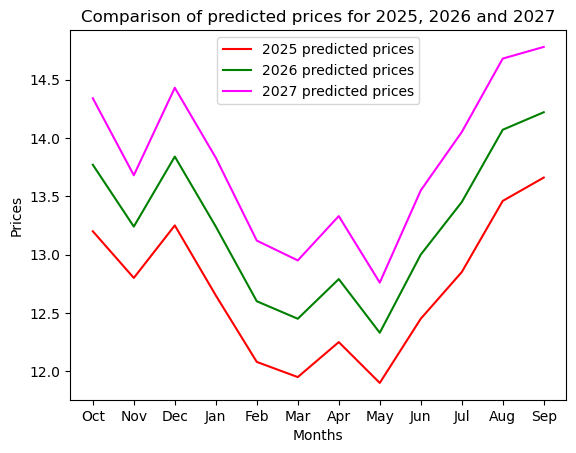

In [1558]:
#plotting all predictions plots simultaneously
Months = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']

plt.plot(Months, np.array(gas_prices2025), color = 'red', label = '2025 predicted prices')
plt.plot(Months, np.array(gas_prices2026), color = 'green', label = '2026 predicted prices')
plt.plot(Months, np.array(gas_prices2027), color = 'magenta', label = '2027 predicted prices')


plt.xlabel("Months")
plt.ylabel("Prices")
plt.title("Comparison of predicted prices for 2025, 2026 and 2027")
plt.legend()
plt.show()

In [1559]:
print("Based on the above visualizations, the prices dip between December and March, and pickup significantly from May to October")
print("The above visualization also indicates that prices decrease in the winter and pickup just after summer")

Based on the above visualizations, the prices dip between December and March, and pickup significantly from May to October
The above visualization also indicates that prices decrease in the winter and pickup just after summer
